# Laboratorio 1 - Regresión

Estudiante 1: Juan Diego Niebles Navas - 202221193 \
Estudiante 2: Miguel Santiago Castillo Hernandez- 201633992 \
Estudiante 3: 

# 1. Entendimiento de los datos

En esta sección se va a escribir las características más relevantes de los datos y todo el perfilamiento de datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado.

In [155]:
# Instalación de paquetes necesarios

!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install statsmodels



#### 1.1 Volumen del Dataset

In [156]:
# Librerias generales

# Pandas
import pandas as pd
import math
pd.set_option('display.max_columns', 50) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar

# Random seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# math

db_location = './Datos/datos_entrenamiento_laboratorio1(train_data).csv'
data = pd.read_csv(db_location, sep=',')
data.shape 


(57934, 50)

In [157]:
display(data.sample(5))

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
39728,Lee Kangin,kr KOR,FW,23-243,"Saturday October 19, 2024",1,1,0.2,0.2,0.0,0.0,2,14,14,14,2,2,0,0,1,4,0.0,0.0,0.4,1,9,3,2,0,10,10,10,2,0,0,5,2,NaN,0,0,0,0,9,1,0,0,0,0.0,€25.00m,30.06.2028
25541,Santiago Castro,ar ARG,FW,19-337,"Saturday August 31, 2024",0,3,0.1,0.1,0.0,0.0,1,19,19,19,2,2,0,0,5,3,0.0,0.0,0.1,1,17,2,0,1,16,16,16,0,0,0,12,4,NaN,0,2,4,1,23,4,1,1,3,42.9,€35.00m,30.06.2028
57391,Ola Aina,ng NGA,LB,27-314,"Saturday August 17, 2024",0,1,0.0,0.0,0.0,0.0,1,33,33,33,4,4,0,0,6,0,0.0,0.0,0.0,1,26,7,0,1,22,22,22,0,2,0,10,0,0.0,1,1,0,0,21,0,2,1,0,NaN,€22.00m,30.06.2028
23414,Pablo Maffeo,es ESP,"RB,RW",27-297,"Monday May 5, 2025",0,0,0.0,0.0,0.0,0.0,0,42,42,42,0,0,4,4,15,1,0.0,0.0,0.0,2,35,7,0,1,37,37,37,0,1,0,10,1,57.1,3,2,3,1,34,4,0,1,1,50.0,€5.00m,30.06.2027
48348,Jonathan Clauss,fr FRA,RM,31-355,"Saturday September 14, 2024",0,0,0.0,0.0,0.4,0.4,4,45,45,45,1,1,1,1,11,6,0.4,0.4,0.2,2,37,7,0,4,35,35,35,1,5,0,19,1,50.0,1,1,0,0,31,4,1,4,0,0.0,€5.00m,30.06.2026


#### 1.2 Valores nulos

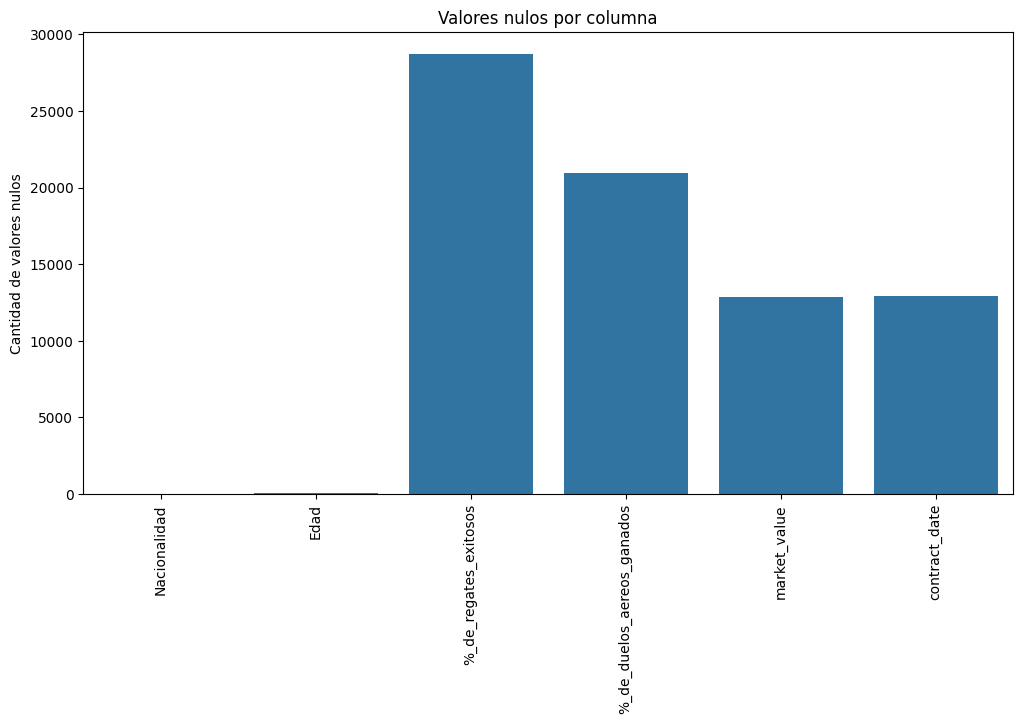

Nacionalidad: 32
Edad: 48
%_de_regates_exitosos: 28722
%_de_duelos_aereos_ganados: 20957
market_value: 12894
contract_date: 12916


In [158]:
# Nulos por columna

columns = data.columns
nulls_per_column = {}
for col in columns:
    if data[col].isnull().sum() > 0:
        nulls_per_column[col] = data[col].isnull().sum()

plt.figure(figsize=(12,6))
sns.barplot(x=list(nulls_per_column.keys()), y=list(nulls_per_column.values()))
plt.xticks(rotation=90)
plt.ylabel("Cantidad de valores nulos")
plt.title('Valores nulos por columna')
plt.show()


for col_name, null_count in nulls_per_column.items():
    if null_count > 0:
        print(f"{col_name}: {null_count}")


#### 1.3 Detección y eliminación de columnas duplicadas

In [159]:
# columnas repetidas

data.T.duplicated().sum()
data.T[data.T.duplicated(keep=False)].T

,xAG,xAG.1,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,xAG.2,xAG.3,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Centros
0,0.0,0.0,60,60,60,6,6,1,1,0.0,0.0,8,43,43,43,8
1,0.7,0.7,30,30,30,2,2,0,0,0.7,0.7,1,22,22,22,1
2,0.1,0.1,33,33,33,1,1,1,1,0.1,0.1,2,28,28,28,2
3,0.1,0.1,33,33,33,1,1,1,1,0.1,0.1,2,28,28,28,2
4,0.2,0.2,11,11,11,0,0,0,0,0.2,0.2,1,10,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57929,0.0,0.0,16,16,16,0,0,0,0,0.0,0.0,2,12,12,12,2
57930,0.0,0.0,4,4,4,1,1,0,0,0.0,0.0,0,4,4,4,0
57931,0.0,0.0,32,32,32,3,3,2,2,0.0,0.0,1,29,29,29,1
57932,0.0,0.0,35,35,35,3,3,0,0,0.0,0.0,3,27,27,27,3


In [160]:
# Borrar columnas repetidas
data = data.loc[:,~data.T.duplicated()]
data.shape


(57934, 40)

#### 1.4 Tipos de datos

In [161]:
# Tipo de dato de cada columna. Nos sirve para identificar columnas categóricas y numéricas y cuales no son la categoría que deberian ser
data.dtypes 

Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_progresivos                   int64
Regates_exitosos                    int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xA                                float64
Pases_en_ultimo_tercio              int64
Pases_balon_vivo                    int64
Pases_balon_muerto                  int64
Pases_al_hueco                      int64
Pases_centros                       int64
Pases_completados                   int64
Pases_fuera_de_juego              

##### 1.4.1 Arreglando Market_value

Es importante arreglar este tipo de dato ya que como es el valor objetivo se necesita ver las relaciones con esta variable



In [162]:
# arreglando market_value

data[['cantidad', 'sufijo']] = data['market_value'].replace({  '-': np.nan, "error": np.nan}, regex=True).str.extract(r'€?([\d\.]+)([mk]?)')
data['cantidad'] = data['cantidad'].astype(float)

# Convertir según sufijo
data['precio_millones'] = data.apply(
    lambda row: row['cantidad'] * 1000000 if row['sufijo'] == 'm' else row['cantidad']*1000 if row['sufijo'] == 'k' else row['cantidad'],
    axis=1
)

data[['market_value', 'cantidad', 'sufijo', 'precio_millones']].sample(10)



,market_value,cantidad,sufijo,precio_millones
21071,NaN,NaN,NaN,NaN
45887,€22.00m,22.0,m,22000000.0
21823,€1.20m,1.2,m,1200000.0
1362,€10.00m,10.0,m,10000000.0
41290,€1.80m,1.8,m,1800000.0
25535,€4.00m,4.0,m,4000000.0
47167,€35.00m,35.0,m,35000000.0
9731,€90.00m,90.0,m,90000000.0
25020,€7.00m,7.0,m,7000000.0
3757,€30.00m,30.0,m,30000000.0


In [163]:
data = data.drop(columns=['cantidad', 'sufijo'])


#### 1.5 Estadisticas descriptivas 

##### 1.5.1 Descripción variables numericas

In [164]:
# Seleccionar las columnas numéricas
number_columns = data.select_dtypes(include=[np.number]).columns

data[number_columns].describe()


,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,precio_millones
count,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,29212.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,36977.000000,4.484000e+04
mean,0.513015,0.792402,0.088635,0.080473,0.062784,1.416750,31.659716,2.416232,0.487451,11.226309,2.341941,0.055056,1.976232,28.593900,2.956140,0.096196,1.133652,25.745624,0.109677,1.502727,0.041513,9.201091,1.410950,43.171587,0.534522,0.801809,0.950133,0.574033,25.518383,2.382470,0.781337,0.834795,48.814187,2.879796e+07
std,16.440600,1.158538,0.209810,0.186549,0.152033,1.727395,22.963272,2.756341,0.897683,10.984869,2.867533,0.122355,2.583320,21.511297,3.733981,0.342576,2.005869,20.703206,0.345491,2.169317,0.207865,9.322087,1.957006,40.232967,0.934409,1.210875,1.221368,0.931852,19.001270,3.158174,1.005105,1.305149,39.560765,3.372563e+08
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,2.000000,0.000000,8.000000,1.000000,0.000000,1.000000,24.000000,1.000000,0.000000,0.000000,21.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,50.000000,1.000000e+07
75%,0.000000,1.000000,0.100000,0.100000,0.100000,2.000000,45.000000,4.000000,1.000000,16.000000,3.000000,0.100000,3.000000,40.000000,4.000000,0.000000,1.000000,37.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,36.000000,4.000000,1.000000,1.000000,100.000000,2.400000e+07
max,995.000000,12.000000,2.900000,2.900000,2.100000,16.000000,171.000000,30.000000,15.000000,95.000000,24.000000,1.400000,37.000000,170.000000,35.000000,8.000000,25.000000,163.000000,5.000000,21.000000,3.000000,102.000000,25.000000,100.000000,10.000000,16.000000,10.000000,8.000000,159.000000,36.000000,9.000000,16.000000,100.000000,9.999990e+09


Podemos evidenciar la presencia de datos fuera de lo normal. Por ejemplo, goles negativos o muy altos o un precio de 9 millones de euros para un jugador.

##### 1.5.2 Cajas y bigotes para detectar patrones

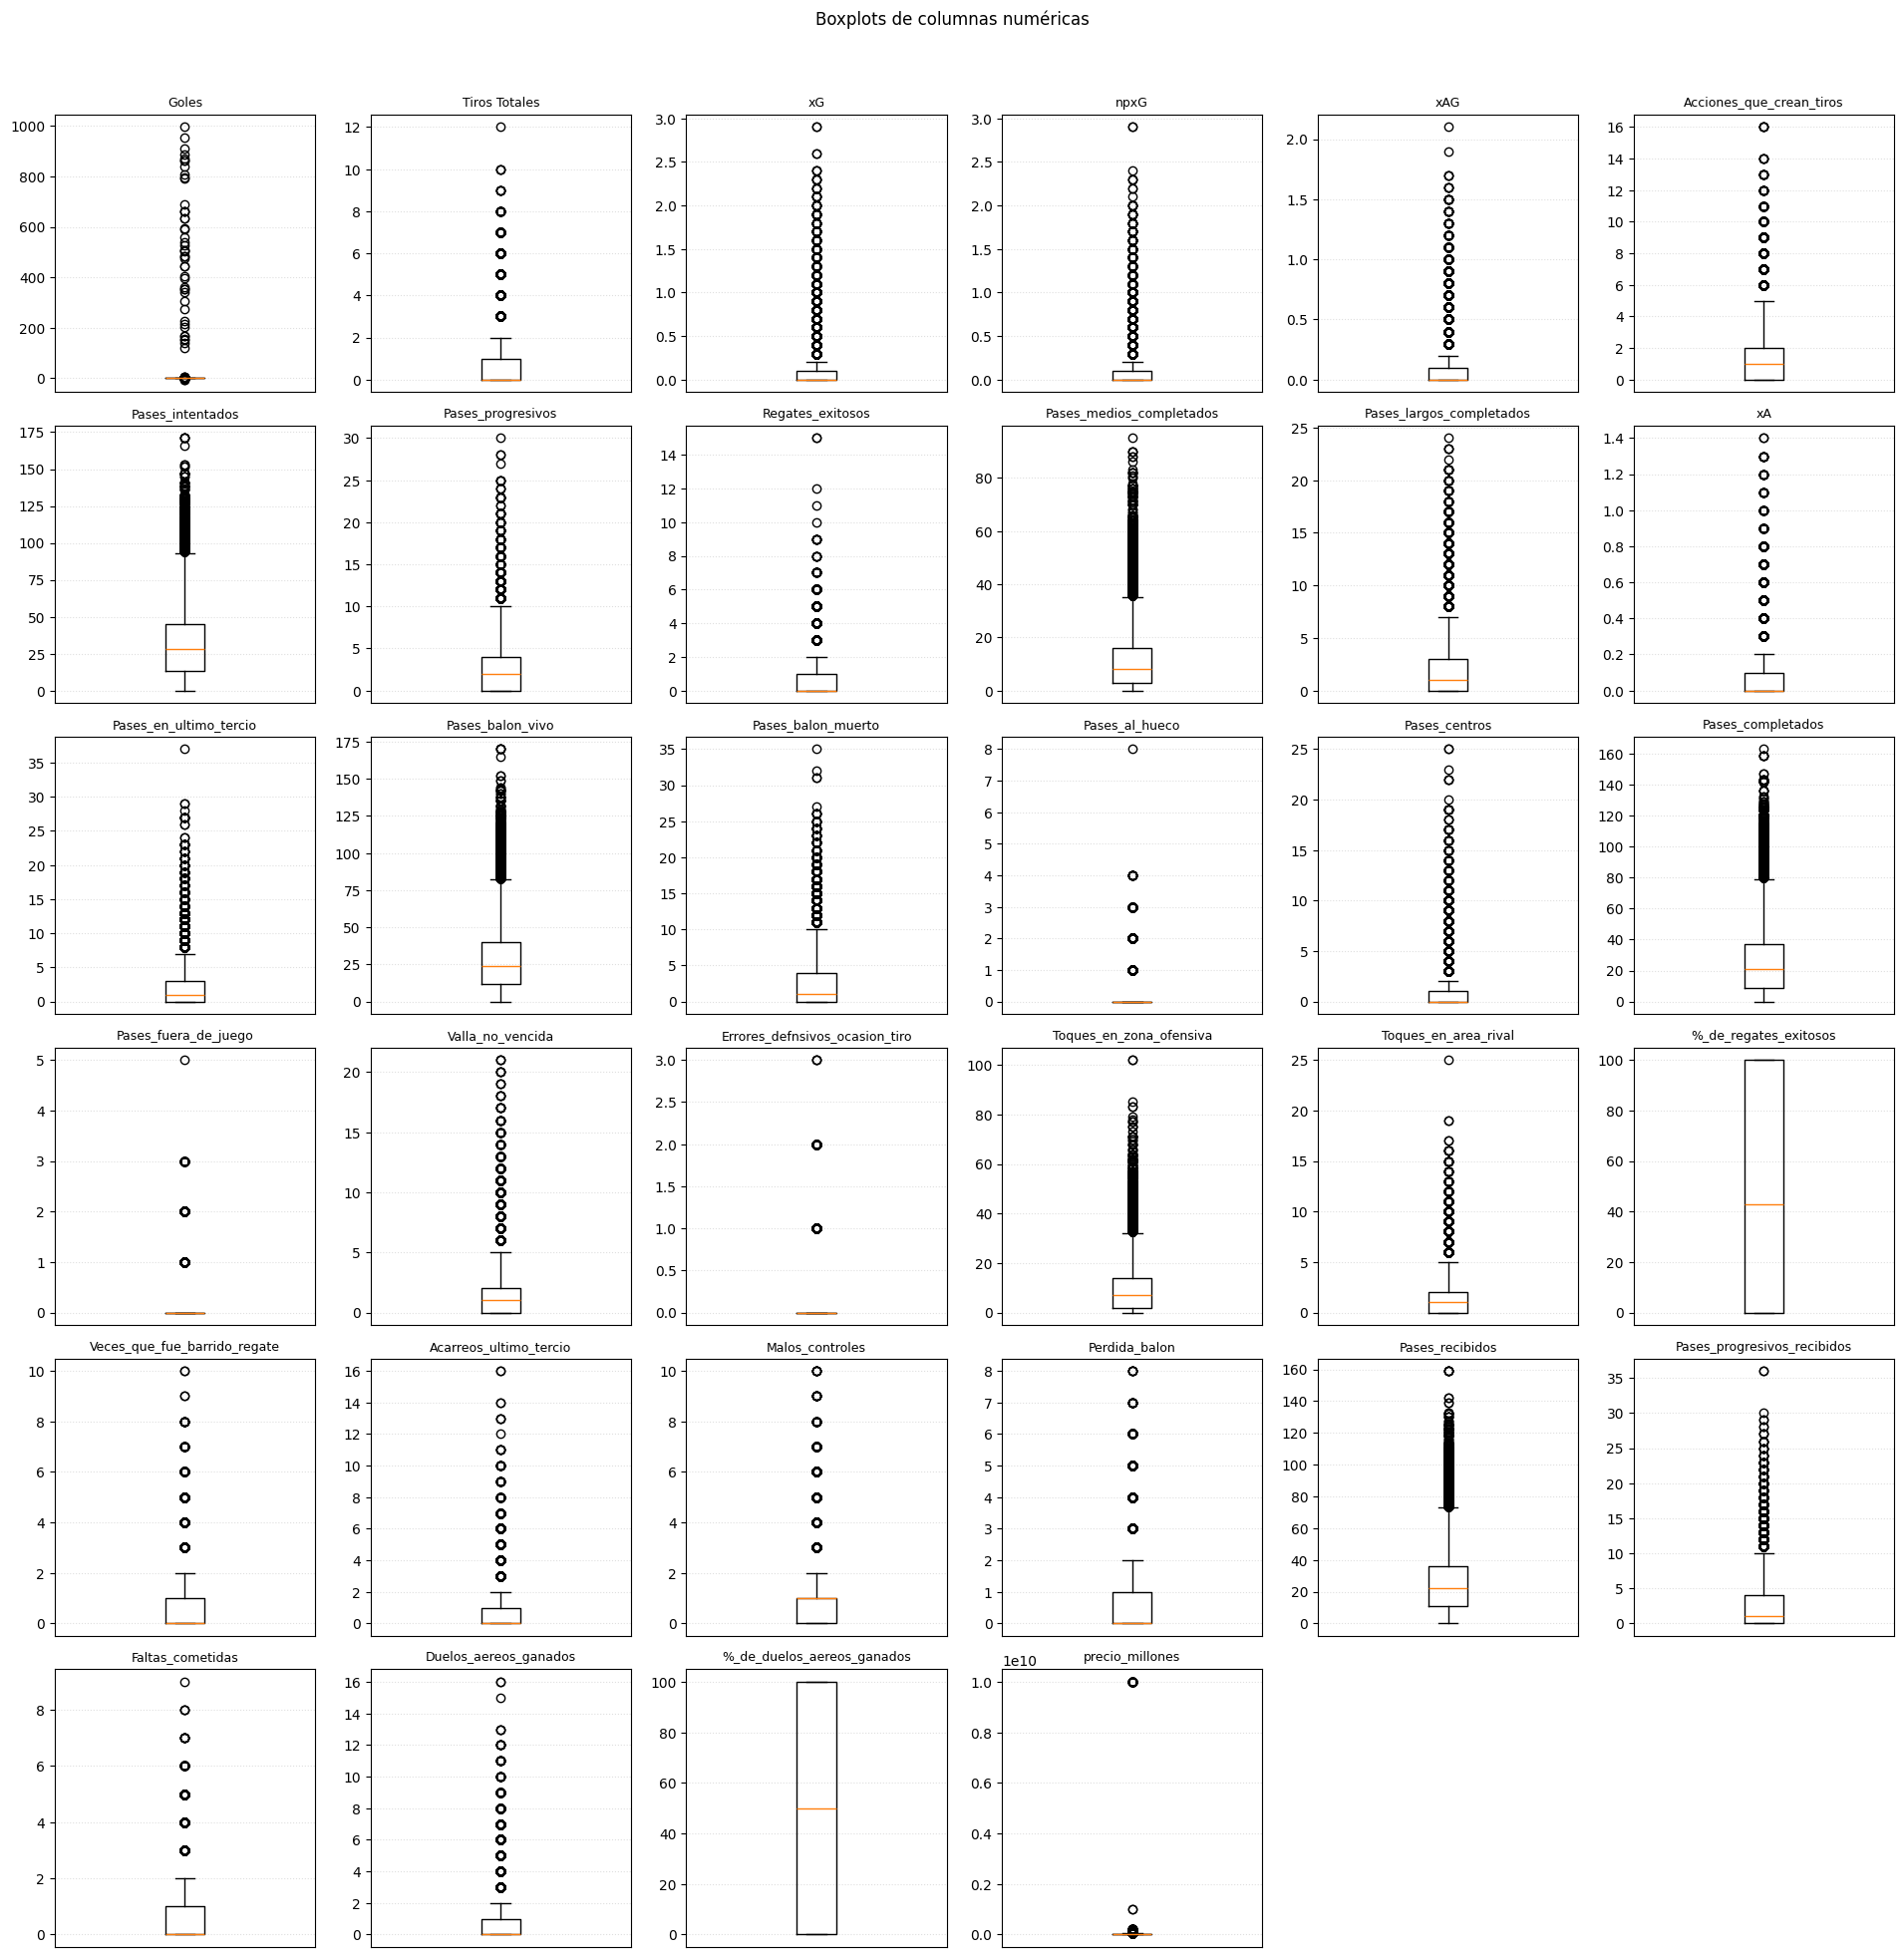

In [165]:
n = len(number_columns)

cols = 6 if n > 20 else 4
rows = math.ceil(n / cols)

# Tamaño de figura proporcional a la grilla
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.2, rows * 3.2))
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(number_columns):
    serie = data[col].dropna()
    # Boxplot por columna
    axes[i].boxplot(serie, vert=True, showfliers=True, whis=1.5)
    axes[i].set_title(str(col), fontsize=9)
    axes[i].set_xticks([])  # sin etiquetas en x para evitar ruido visual
    axes[i].grid(True, axis='y', linestyle=':', alpha=0.4)

# Ocultar ejes sobrantes si la grilla es mayor que la cantidad de columnas
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

fig.suptitle('Boxplots de columnas numéricas', fontsize=12, y=1.02)
plt.tight_layout()
plt.show()


##### 1.5.2 Estadisticas especificas variable objetivo

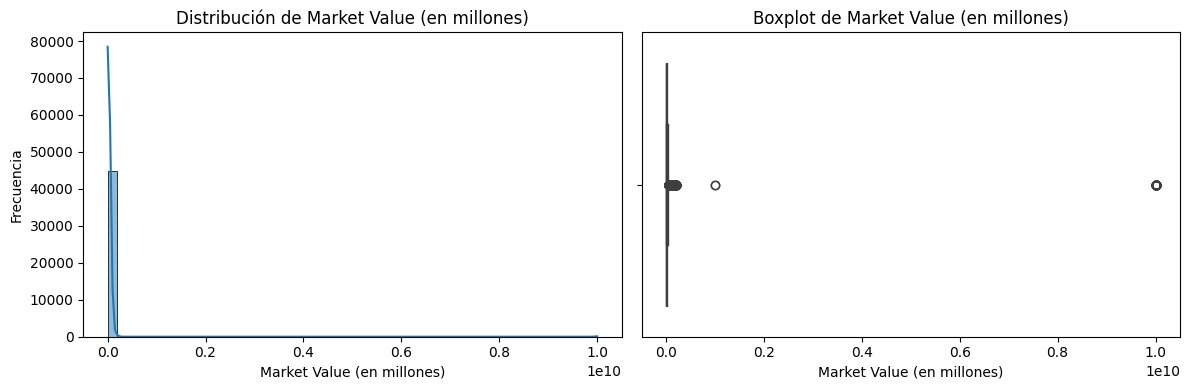

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma 
sns.histplot(data['precio_millones'].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Market Value (en millones)')
axes[0].set_xlabel('Market Value (en millones)')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=data['precio_millones'].dropna(), ax=axes[1])
axes[1].set_title('Boxplot de Market Value (en millones)')
axes[1].set_xlabel('Market Value (en millones)')

plt.tight_layout()  # Ajusta automáticamente los espacios
plt.show()

##### 1.5.3 Correlaciones 

In [167]:
col_objetivo = 'precio_millones'
correlaciones = data.corr(numeric_only=True)[col_objetivo].drop(col_objetivo)
correlaciones = correlaciones.sort_values(ascending=False)

print(correlaciones)

Goles                             0.589467
Pases_recibidos                   0.022306
Pases_balon_vivo                  0.020446
Pases_completados                 0.019978
Pases_medios_completados          0.017640
Pases_intentados                  0.017546
Pases_progresivos                 0.016144
xG                                0.013942
Toques_en_zona_ofensiva           0.013156
Pases_en_ultimo_tercio            0.011416
Acciones_que_crean_tiros          0.011209
Toques_en_area_rival              0.010978
npxG                              0.010182
Tiros Totales                     0.009810
Pases_largos_completados          0.009422
Perdida_balon                     0.009271
xAG                               0.007332
Pases_progresivos_recibidos       0.006949
Regates_exitosos                  0.006545
xA                                0.006299
Veces_que_fue_barrido_regate      0.005888
Acarreos_ultimo_tercio            0.005435
Pases_al_hueco                    0.005337
Pases_fuera

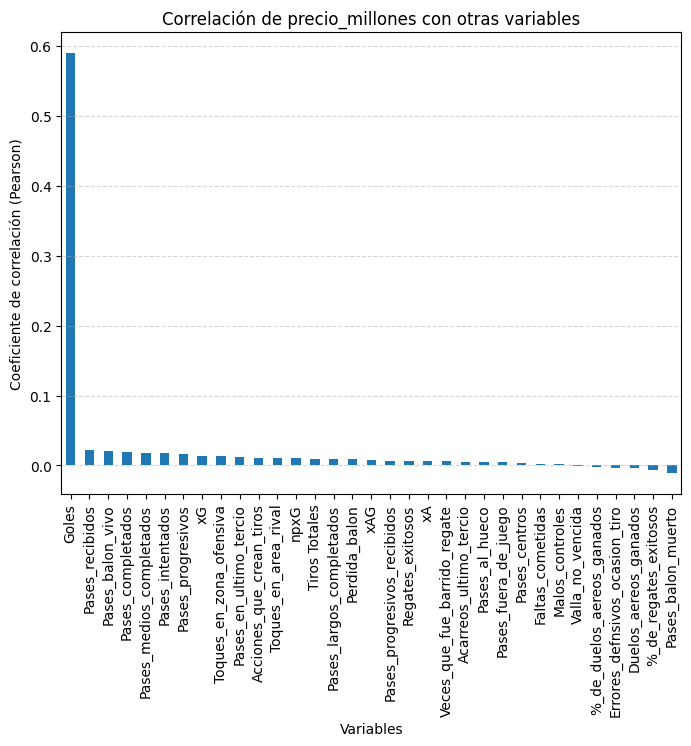

In [168]:
plt.figure(figsize=(8,6))
correlaciones.plot(kind='bar')
plt.title(f'Correlación de {col_objetivo} con otras variables')
plt.ylabel('Coeficiente de correlación (Pearson)')
plt.xlabel('Variables')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

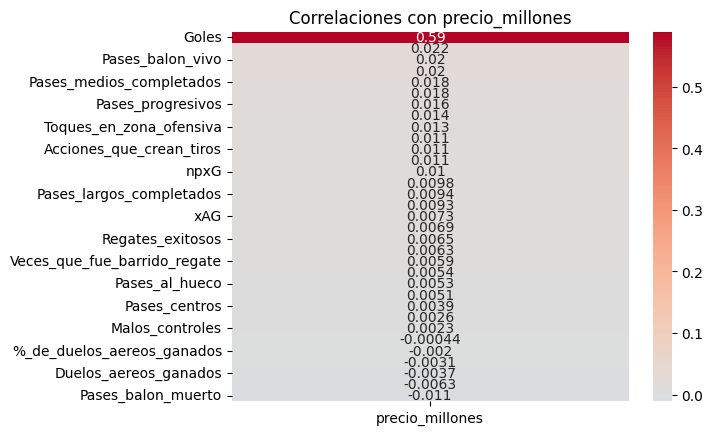

In [169]:
sns.heatmap(correlaciones.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlaciones con {col_objetivo}')
plt.show()

##### 1.5.4 Correlaciones entre variables

Esta correlación sirve para encontrar columnas redundantes

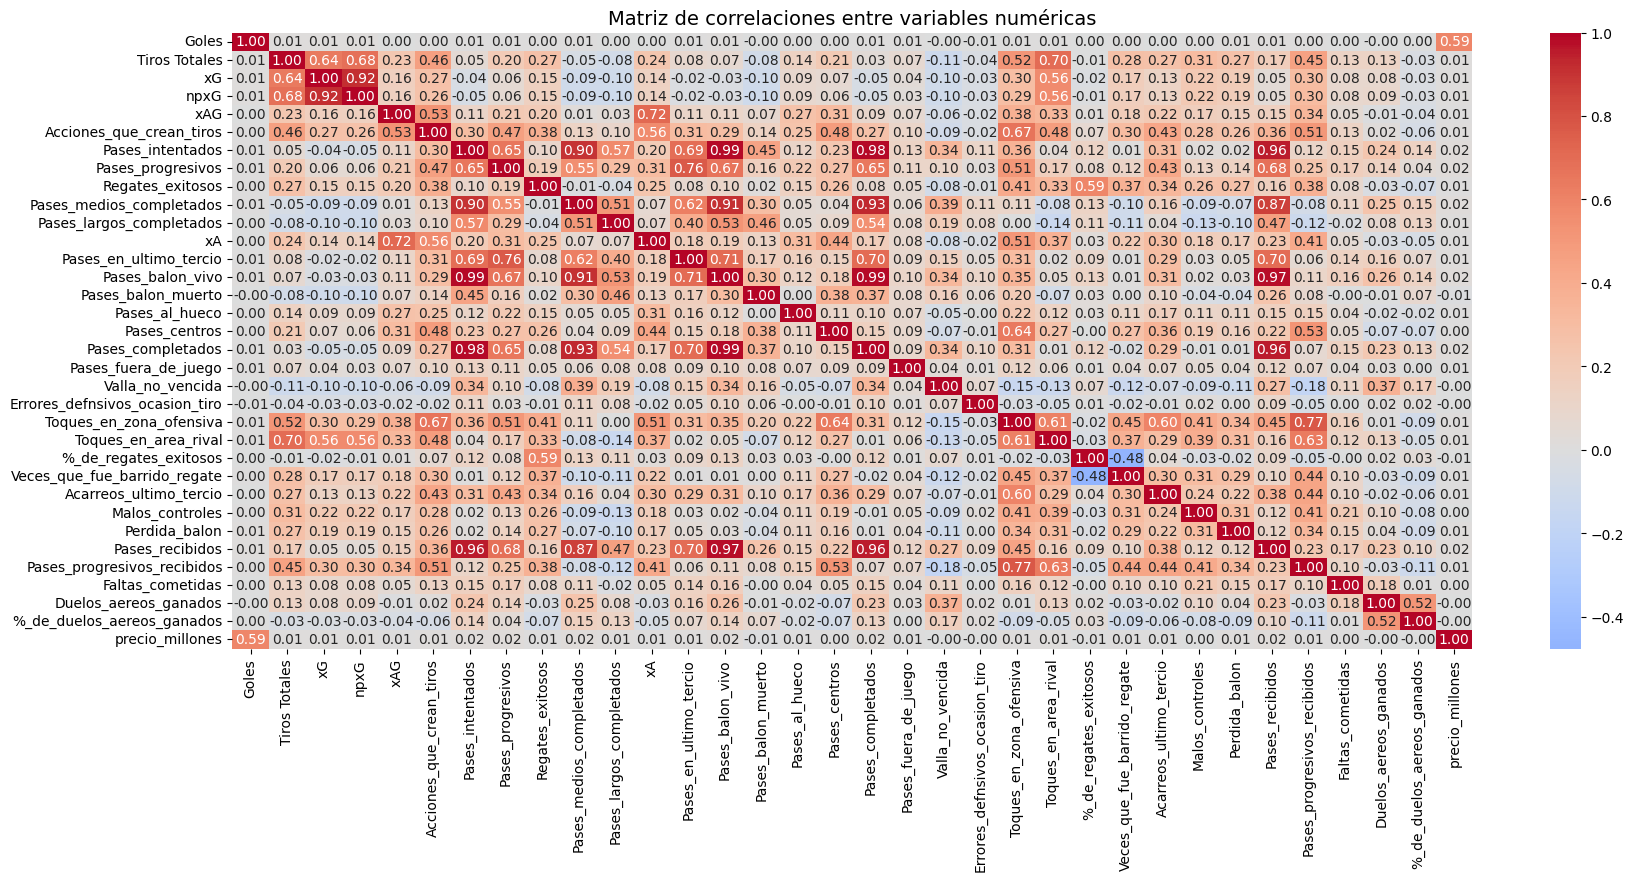

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones entre variables numéricas", fontsize=14)
plt.show()

##### 1.6 Conclusión entendimiento de los datos

¿Cuántas columnas tenemos?\
¿Qué tipos de datos tenemos?\
¿Cuánta información nula hay?\
Columnas repetidas\
¿Estos datos representan la situación real?\
¿Cuáles son las tendencias de los datos?


La fuente de los datos que tenemos es un archivo csv, el cual trata de 57935 jugadores de futbol con diferentes estadísticas y como preforman en los partidos. En este data set tenemos una cantidad de 50 columnas, la primera columna es el nombre del jugador, la segunda es la nacionalidad, la tercera es la posición, la cuarta es la edad, la quinta es el día del último partido y los 45 restantes son diferentes estadísticas, que representan el rendimiento del jugador en la temporada 2024/2025.  Entre los tipos de datos podemos encontrar cadenas de caracteres, numero enteros y flotantes, porcentajes y otros tipos de datos mixtos. En cuanto a la información vacía se ve mayormente en las columnas %_de_regates_exitosos con 28722 datos faltantes, %_de_duelos_aereos_ganados con 20957 datos vacíos, market_value con 12894 datos nulos y contract_date con 12916 datos vacíos. Otras columnas con datos vacíos, pero con una menor cantidad son nacionalidad y edad.  De la misma forma ahí celdas con caracteres que no deberían ser caracteres como un guion o un mensaje error. “tendencias de datos” 

# 2. preparacion de datos
##### 2.1 Selccion de los datos
Se genera una lista con las varibeles que se consideraron las mas importantates y que afectan más el market_value de un jugador. Desde haora solo se va a trabajar con estas variables.

In [171]:
variables = ["Jugador", "Nacionalidad", "Posicion", "Edad", "Dia_partido", "Goles", "Pases_recibidos", "Pases_balon_vivo", "Pases_completados", "Pases_intentados", "xG", "precio_millones"]
dfescojido = data[variables]
display(dfescojido.head())

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Pases_recibidos,Pases_balon_vivo,Pases_completados,Pases_intentados,xG,precio_millones
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,51,51,43,60,1.2,5.000000e+07
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,37,30,22,30,0.0,5.000000e+07
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,26,28,28,33,0.0,NaN
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,26,28,28,33,0.0,1.000000e+09
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,12,11,10,11,0.7,4.500000e+07


### Ingeniería de características

### Estandarización de datos y limpieza de datos
Primero vamos a hacer una integracion de las fechas poniendo todas en un mismo formato

In [172]:
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" North", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" West", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" Derby", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" El", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" Choc", "")
dfescojido.loc[:, "Dia_partido"] = pd.to_datetime(dfescojido["Dia_partido"], format="%A %B %d, %Y")


dfescojido.loc[:, "Edad"] = dfescojido["Edad"].str.replace("-", ".")
dfescojido.to_csv("dfescojido_limpio.csv", index=False)


para la estandarisacion y la limpieza de datos vamos a usar una grafica de cajas y bigotes para definir cuales son los datos atipicos y despues poder solucionar este problema.

C:\Users\esteb\AppData\Local\Temp\ipykernel_2420\1373544657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfescojido.loc["Edad"] = dfescojido["Edad"].astype(float)


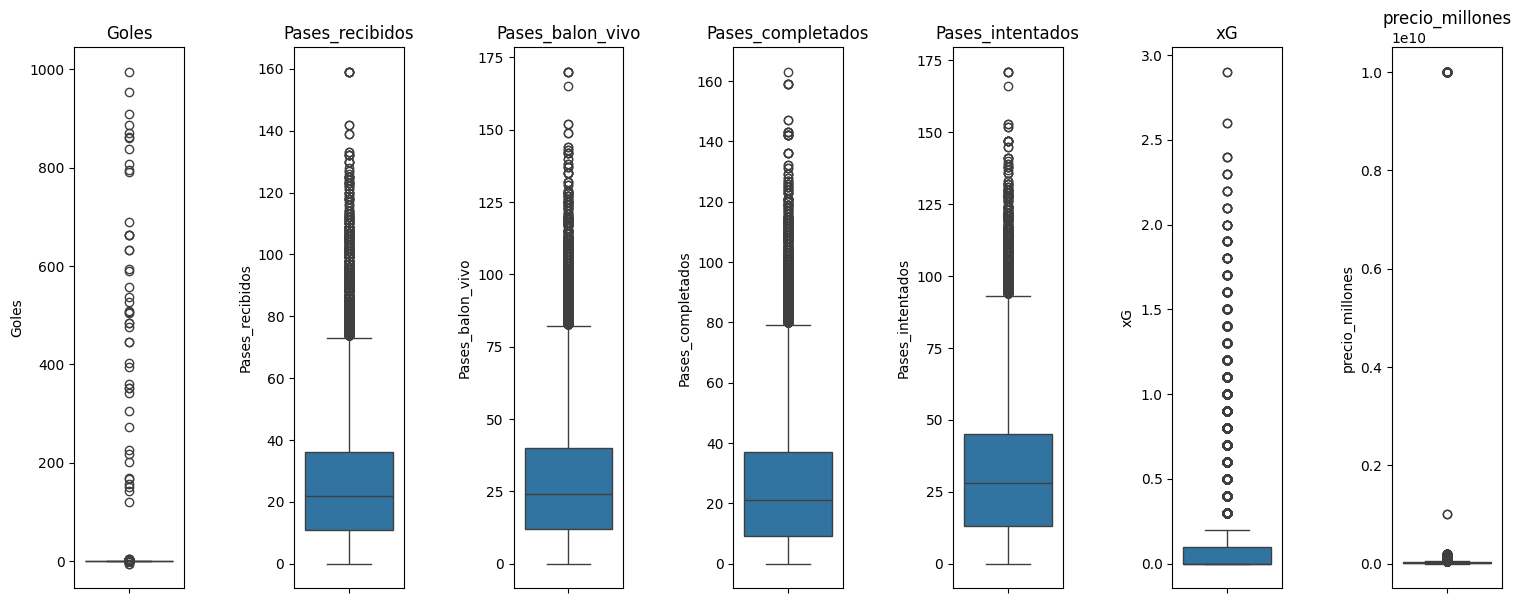

In [173]:
dfescojido.loc["Edad"] = dfescojido["Edad"].astype(float)

l = dfescojido.dtypes

number_columns = dfescojido.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 6))

plt.tight_layout()

for i, variable in enumerate(number_columns):
    sns.boxplot(y=dfescojido[variable], ax=axes[i])
    axes[i].set_title(f"{variable}")
plt.subplots_adjust(wspace=1) 
plt.show()

Como nos podemos dar cuenta los que tienen menos centido son los goles metidos en un partido y precio del jugador en millones, tienen muchos valore atipicos que no hacen nada de sentido. Lo primero que vamos ha hacer es quitra los datos duplicados y un jugador no puede jugar dos o más partidos el mismo dia trataremos estos tambein como datos duplicados. En la base de datos algunos jugadores juegan dos partidos el mismo dia, tomaremos los datos mas nomrales con respecto al grafico anterior de cada partido para solo dejarel un partido ese dia. 

In [174]:
dfescojido = dfescojido.sort_values(by=["Jugador", "Dia_partido"], ascending=False)
limitadoPrecio = dfescojido[(dfescojido['precio_millones'] >= 0) & (dfescojido['precio_millones'] <= 500000000)]
mediaPrecioJugador = limitadoPrecio.groupby('Jugador')['precio_millones'].mean()
print(mediaPrecioJugador)
limitadoGoles = dfescojido[(dfescojido['Goles'] >= 0) & (dfescojido['Goles'] <= 13)]
mediaGolesJugador = limitadoGoles.groupby('Jugador')['Goles'].mean()
print(mediaGolesJugador)

for jugador, media in mediaPrecioJugador.items():
    dfescojido.loc[
        (dfescojido['Jugador'] == jugador) & 
        (dfescojido['precio_millones'] < 0) & 
        (dfescojido['precio_millones'] > 500000000), 
        'precio_millones'
    ] = round(media)

dfescojido = dfescojido.dropna(subset=['precio_millones'])
dfescojido = dfescojido[(dfescojido['precio_millones'] >= 0) & (dfescojido['precio_millones'] <= 500000000)]

for jugador, media in mediaGolesJugador.items():
    dfescojido.loc[
        (dfescojido['Jugador'] == jugador) & 
        (dfescojido['Goles'] < 0) & 
        (dfescojido['Goles'] > 13), 
        'Goles'
    ] = round(media)


dfescojido = dfescojido.dropna(subset=['Goles'])
dfescojido = dfescojido[(dfescojido['Goles'] >= 0) & (dfescojido['Goles'] <= 13)]
display(dfescojido)
dfescojido.to_csv("dfescojido.csv", index=False)

Jugador
Aaron Ciammaglichella      700000.0
Aaron Martin              6500000.0
Aaron Ramsdale           13000000.0
Aaron WanBissaka         24000000.0
Abakar Sylla             10000000.0
                            ...    
Zeki Celik                6000000.0
Zion Suzuki              15000000.0
Zito Luvumbo              5000000.0
Ørjan Nyland               900000.0
Þorir Johann Helgason     3000000.0
Name: precio_millones, Length: 1533, dtype: float64
Jugador
Aaron Ciammaglichella    0.000000
Aaron Cresswell          0.000000
Aaron Malouda            0.000000
Aaron Martin             0.000000
Aaron Ramsdale           0.000000
                           ...   
Ørjan Nyland             0.000000
Þorir Johann Helgason    0.000000
Đorđe Petrovic           0.000000
Łukasz Fabianski         0.000000
Łukasz Skorupski         0.111111
Name: Goles, Length: 2242, dtype: float64


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Pases_recibidos,Pases_balon_vivo,Pases_completados,Pases_intentados,xG,precio_millones
37429,Þorir Johann Helgason,is ISL,LM,24.239,2025-05-25 00:00:00,0.0,2.0,5.0,7.0,9.0,0.0,3000000.0
37176,Þorir Johann Helgason,is ISL,AM,24.232,2025-05-18 00:00:00,0.0,8.0,8.0,8.0,12.0,0.1,3000000.0
36746,Þorir Johann Helgason,is ISL,AM,24.225,2025-05-11 00:00:00,0.0,19.0,24.0,21.0,30.0,0.0,3000000.0
36325,Þorir Johann Helgason,is ISL,DM,24.217,2025-05-03 00:00:00,0.0,18.0,22.0,15.0,23.0,0.1,3000000.0
36110,Þorir Johann Helgason,is ISL,LW,24.211,2025-04-27 00:00:00,0.0,2.0,4.0,4.0,4.0,0.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Aaron Martin,es ESP,"LB,WB",27.146,2024-09-15 00:00:00,0.0,38.0,45.0,38.0,56.0,0.0,6500000.0
25653,Aaron Martin,es ESP,WB,27.132,2024-09-01 00:00:00,0.0,35.0,39.0,39.0,55.0,0.0,6500000.0
25197,Aaron Martin,es ESP,WB,27.124,2024-08-24 00:00:00,0.0,19.0,26.0,26.0,40.0,0.0,6500000.0
24784,Aaron Martin,es ESP,"WB,LM",27.117,2024-08-17 00:00:00,0.0,17.0,18.0,20.0,32.0,0.0,6500000.0


In [175]:

dfescojido = dfescojido.drop_duplicates()


dfescojido.loc[
        (dfescojido['Jugador'] == "Fer Lopez"), "Nacionalidad"
    ] = "es ESP"

dfescojido.loc[
        (dfescojido['Jugador'] == "Mateus Mane"), "Nacionalidad"
    ] = "pt POR"
display(dfescojido)

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Pases_recibidos,Pases_balon_vivo,Pases_completados,Pases_intentados,xG,precio_millones
37429,Þorir Johann Helgason,is ISL,LM,24.239,2025-05-25 00:00:00,0.0,2.0,5.0,7.0,9.0,0.0,3000000.0
37176,Þorir Johann Helgason,is ISL,AM,24.232,2025-05-18 00:00:00,0.0,8.0,8.0,8.0,12.0,0.1,3000000.0
36746,Þorir Johann Helgason,is ISL,AM,24.225,2025-05-11 00:00:00,0.0,19.0,24.0,21.0,30.0,0.0,3000000.0
36325,Þorir Johann Helgason,is ISL,DM,24.217,2025-05-03 00:00:00,0.0,18.0,22.0,15.0,23.0,0.1,3000000.0
36110,Þorir Johann Helgason,is ISL,LW,24.211,2025-04-27 00:00:00,0.0,2.0,4.0,4.0,4.0,0.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Aaron Martin,es ESP,"LB,WB",27.146,2024-09-15 00:00:00,0.0,38.0,45.0,38.0,56.0,0.0,6500000.0
25653,Aaron Martin,es ESP,WB,27.132,2024-09-01 00:00:00,0.0,35.0,39.0,39.0,55.0,0.0,6500000.0
25197,Aaron Martin,es ESP,WB,27.124,2024-08-24 00:00:00,0.0,19.0,26.0,26.0,40.0,0.0,6500000.0
24784,Aaron Martin,es ESP,"WB,LM",27.117,2024-08-17 00:00:00,0.0,17.0,18.0,20.0,32.0,0.0,6500000.0


In [176]:
nacimiento =  pd.to_datetime("24/05/2004", format="%d/%m/%Y")

indeces_fer = dfescojido.loc[
        (dfescojido['Jugador'] == "Fer Lopez")
    ].index

for i in indeces_fer:
    edadp =  (dfescojido["Dia_partido"][i] - nacimiento)
    años = edadp.days // 365
    dias = round((((edadp.days / 365) - años) *365)/1000, 4 )

    totalAños = float(años) + float(dias)

    dfescojido["Edad"][i] = float(totalAños)


nacimiento =  pd.to_datetime("16/11/2007", format="%d/%m/%Y")

indeces_fer = dfescojido.loc[
        (dfescojido['Jugador'] == "Mateus Mane") &
        (dfescojido['Edad'].isnull())
    ].index

for i in indeces_fer:
    edadp =  (dfescojido["Dia_partido"][i] - nacimiento)
    años = edadp.days // 365
    dias = round((((edadp.days / 365) - años) *365)/1000, 4 )

    totalAños = float(años) + float(dias)

    dfescojido["Edad"][i] = float(totalAños)

display(dfescojido)

C:\Users\esteb\AppData\Local\Temp\ipykernel_2420\4165859275.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfescojido["Edad"][i] = float(totalAños)
C:\Users\esteb\AppData\Local\Temp\ipykernel_2420\4165859275.py:14: FutureWarning: Chain

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Pases_recibidos,Pases_balon_vivo,Pases_completados,Pases_intentados,xG,precio_millones
37429,Þorir Johann Helgason,is ISL,LM,24.239,2025-05-25 00:00:00,0.0,2.0,5.0,7.0,9.0,0.0,3000000.0
37176,Þorir Johann Helgason,is ISL,AM,24.232,2025-05-18 00:00:00,0.0,8.0,8.0,8.0,12.0,0.1,3000000.0
36746,Þorir Johann Helgason,is ISL,AM,24.225,2025-05-11 00:00:00,0.0,19.0,24.0,21.0,30.0,0.0,3000000.0
36325,Þorir Johann Helgason,is ISL,DM,24.217,2025-05-03 00:00:00,0.0,18.0,22.0,15.0,23.0,0.1,3000000.0
36110,Þorir Johann Helgason,is ISL,LW,24.211,2025-04-27 00:00:00,0.0,2.0,4.0,4.0,4.0,0.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Aaron Martin,es ESP,"LB,WB",27.146,2024-09-15 00:00:00,0.0,38.0,45.0,38.0,56.0,0.0,6500000.0
25653,Aaron Martin,es ESP,WB,27.132,2024-09-01 00:00:00,0.0,35.0,39.0,39.0,55.0,0.0,6500000.0
25197,Aaron Martin,es ESP,WB,27.124,2024-08-24 00:00:00,0.0,19.0,26.0,26.0,40.0,0.0,6500000.0
24784,Aaron Martin,es ESP,"WB,LM",27.117,2024-08-17 00:00:00,0.0,17.0,18.0,20.0,32.0,0.0,6500000.0


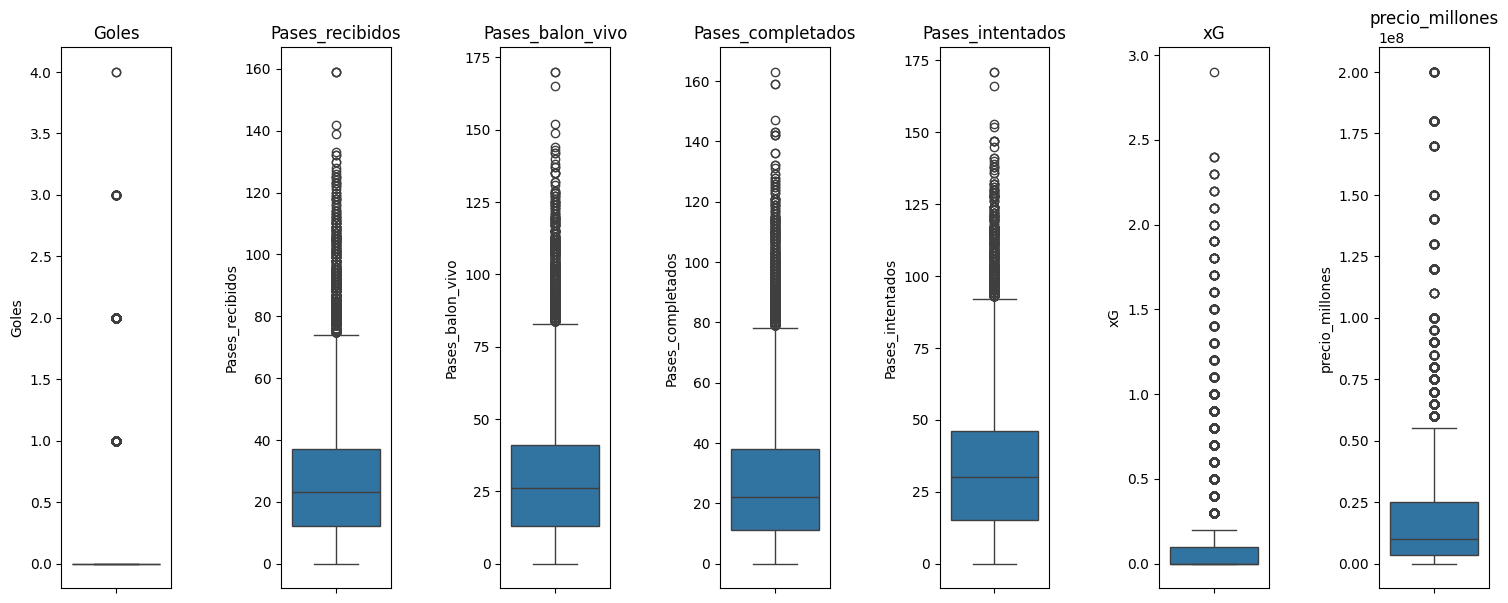

In [177]:
number_columns = dfescojido.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 6))
plt.tight_layout()

for i, variable in enumerate(number_columns):
    sns.boxplot(y=dfescojido[variable], ax=axes[i])
    axes[i].set_title(f"{variable}")
plt.subplots_adjust(wspace=1) 
plt.show()

# Supuestos

### Linealidad

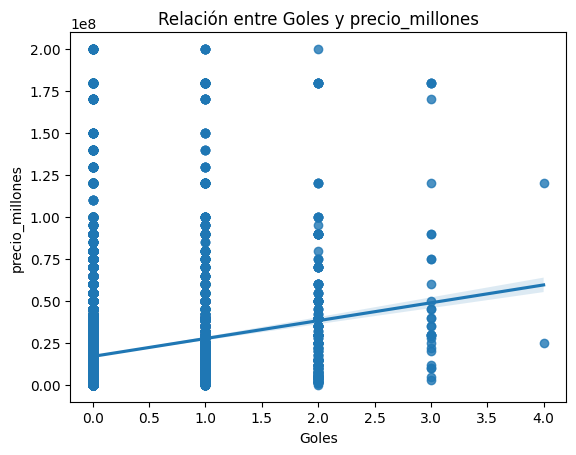

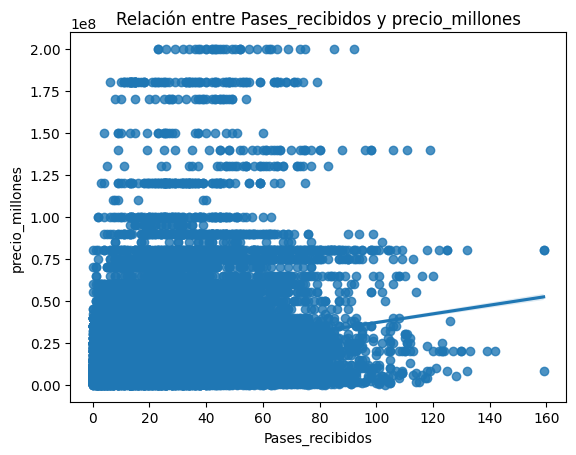

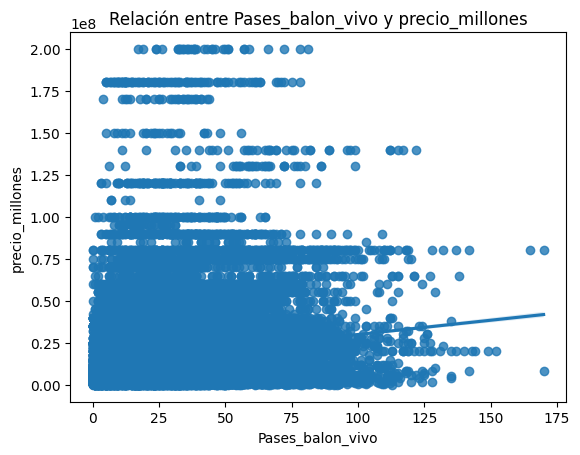

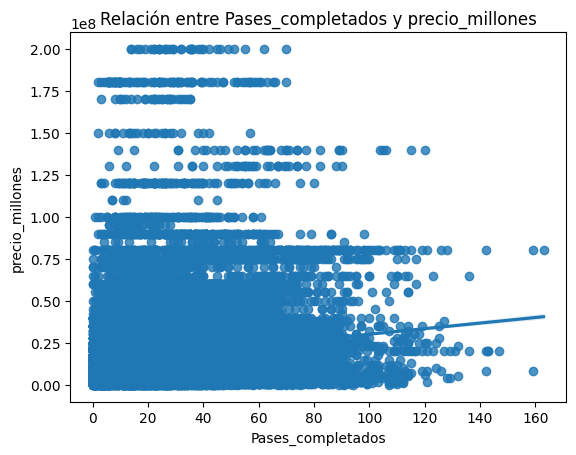

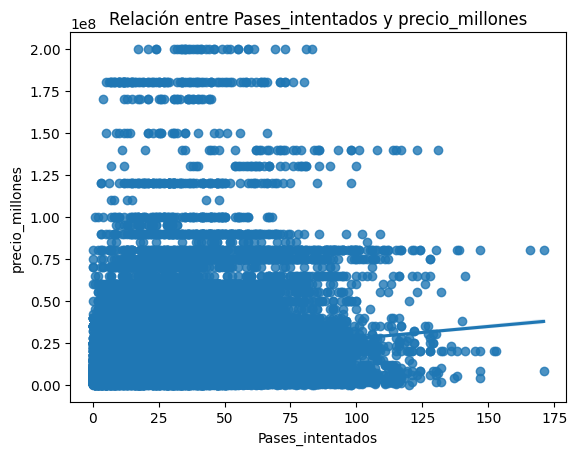

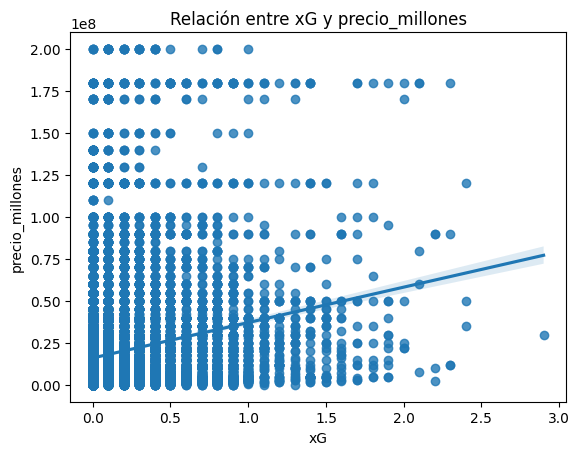

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

target = "precio_millones"

features = dfescojido.select_dtypes(include='number').drop(columns=[target]).columns

for col in features:
    sns.regplot(x=dfescojido[col], y=dfescojido[target])
    plt.title(f'Relación entre {col} y {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()


In [179]:
import numpy as np
import pandas as pd

target = "precio_millones"  


num_cols = dfescojido.select_dtypes(include=['number']).columns.drop(target)
non_num_cols = dfescojido.select_dtypes(exclude=['number']).columns


df_num_log = np.log1p(dfescojido[num_cols])


df_transformado = pd.concat(
    [dfescojido[non_num_cols], df_num_log,dfescojido[[target]]],
    axis=1
)


print(df_transformado.head())


                     Jugador Nacionalidad Posicion    Edad  \
37429  Þorir Johann Helgason       is ISL       LM  24.239   
37176  Þorir Johann Helgason       is ISL       AM  24.232   
36746  Þorir Johann Helgason       is ISL       AM  24.225   
36325  Þorir Johann Helgason       is ISL       DM  24.217   
36110  Þorir Johann Helgason       is ISL       LW  24.211   

               Dia_partido  Goles  Pases_recibidos  Pases_balon_vivo  \
37429  2025-05-25 00:00:00    0.0         1.098612          1.791759   
37176  2025-05-18 00:00:00    0.0         2.197225          2.197225   
36746  2025-05-11 00:00:00    0.0         2.995732          3.218876   
36325  2025-05-03 00:00:00    0.0         2.944439          3.135494   
36110  2025-04-27 00:00:00    0.0         1.098612          1.609438   

       Pases_completados  Pases_intentados       xG  precio_millones  
37429           2.079442          2.302585  0.00000        3000000.0  
37176           2.197225          2.564949  0.09531 

### multicolinealidad

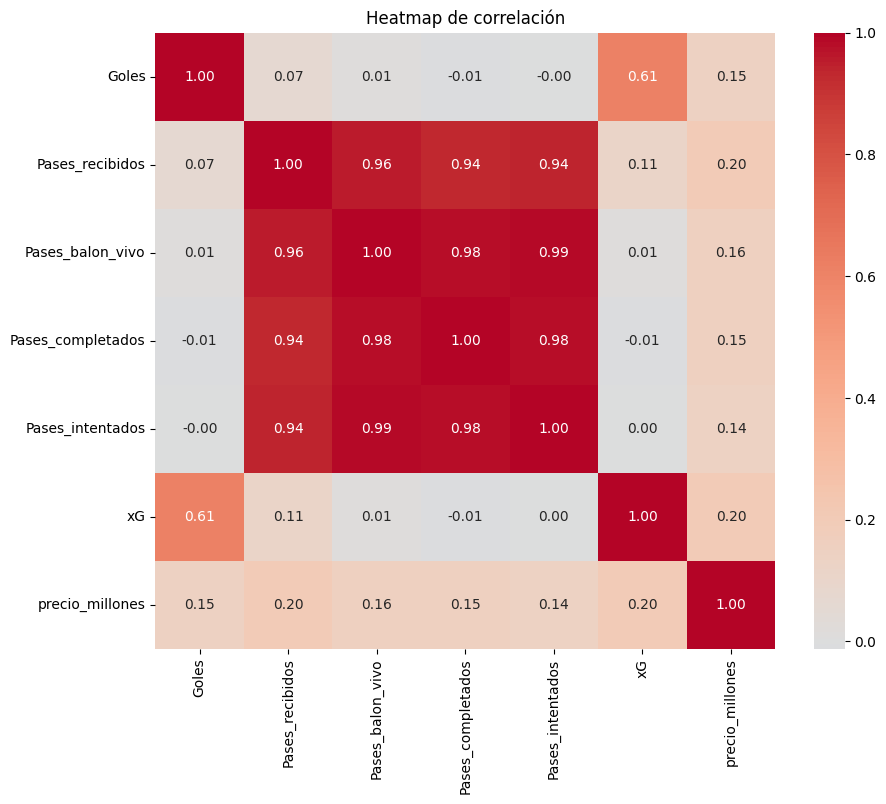

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación solo para variables numéricas
corr = df_transformado.select_dtypes(include='number').corr()

# Graficamos
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Heatmap de correlación")
plt.show()


In [181]:
import numpy as np

df_transformado['Precision_pase'] = (
    df_transformado['Pases_completados'] / df_transformado['Pases_intentados']
)

df_transformado['Precision_pase'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_transformado['Precision_pase'].fillna(0, inplace=True)

df_transformado.drop(columns=['Pases_completados','Pases_intentados'], inplace=True)


C:\Users\esteb\AppData\Local\Temp\ipykernel_2420\2436263429.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transformado['Precision_pase'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_2420\2436263429.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [182]:
df_transformado.drop(columns=['Pases_balon_vivo'], inplace=True)

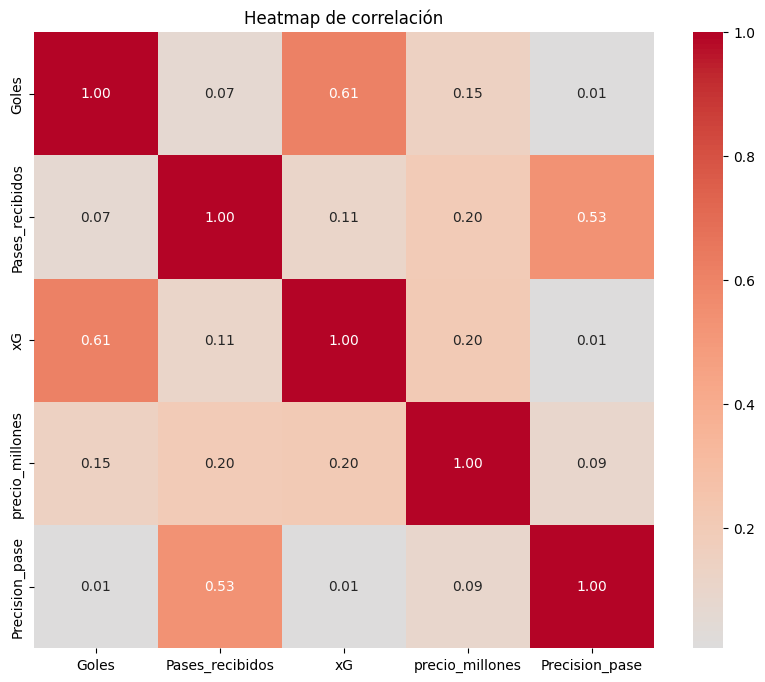

In [183]:
corr = df_transformado.select_dtypes(include='number').corr()

# Graficamos
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Heatmap de correlación")
plt.show()